# Exploratory Data Analysis


# Important Libraries

## 1. Pandas


Pandas is a Python programming language for data manipulation and data analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

## 2. Numpy

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,along with a large collection of high-level mathematical functions to operate on these arrays

## 3. Matplotlib


Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and
interactive environments across platforms


## 4. Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and
informative statistical graphics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline        #%matplotlib inline will lead to static images of your plot embedded in the notebook


UsageError: unrecognized arguments: #%matplotlib inline will lead to static images of your plot embedded in the notebook


## Objective

Our Objectives are as follows:

## Data cleansing


Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a
record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then
replacing, modifying, or deleting the dirty or coarse data.


## Data wrangling


Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data
form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such
as analytics.This may include further munging, data visualization, data aggregation, training a statistical model, as well as
many other potential uses.

## Metadata

Our Metadata contains 10015 unique image_id but 7470 unique lesion_id. Most of the cancer images are from 'nv' cancer
type which is around 67% , 'mel' cancer images are around 11% and other 5 cancer type (bkl,dcc,df,akiec, vasc) are 22% as
whole.


In [3]:
data=pd.read_csv("HAM10000_metadata.csv")
data.sort_values("lesion_id", inplace = True)

In [4]:
data.head() # original data has matrix 10015x07

,lesion_id,image_id,dx,dx_type,age,sex,localization
9187,HAM_0000000,ISIC_0028498,nv,histo,60.0,male,back
9188,HAM_0000000,ISIC_0025346,nv,histo,60.0,male,back
726,HAM_0000001,ISIC_0027859,bkl,histo,70.0,female,face
1661,HAM_0000002,ISIC_0032622,mel,histo,65.0,female,lower extremity
1660,HAM_0000002,ISIC_0033848,mel,histo,65.0,female,lower extremity


By Visualizing data with respect to cancer type dx, which are 7 in numbers. We can clearly see that nv group has (around
67%) infected more people in our data.

<AxesSubplot:xlabel='dx', ylabel='count'>

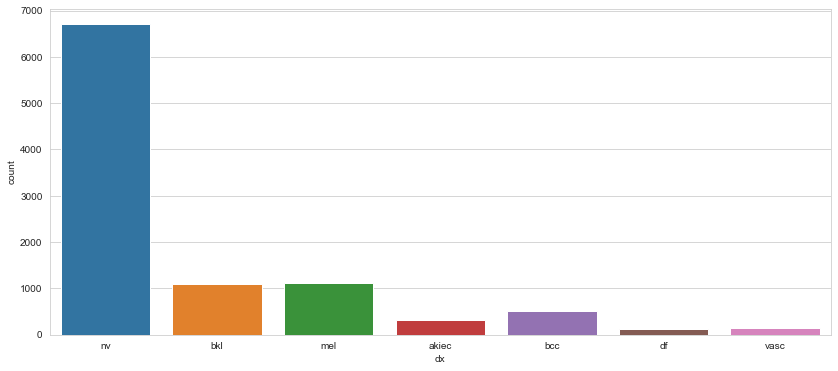

In [5]:
# Looking for Which cancer has infected people more.
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='dx',data=data)

## isnull()


While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame which later
creates problems while operating that data frame. Pandas isnull() and notnull() methods are used to check and manage NULL
values in a data frame.


In [6]:
 data.isnull().head() # looking for null values

,lesion_id,image_id,dx,dx_type,age,sex,localization
9187,False,False,False,False,False,False,False
9188,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False
1661,False,False,False,False,False,False,False
1660,False,False,False,False,False,False,False


In [7]:
 """counting null values column-wise using sum() library with isnull().And there are 57 null values in column age"""
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Visualizing the data to see wheather our data contains null values or not by using sns.heatmap(). It is clear that age contains
some null values.


<AxesSubplot:>

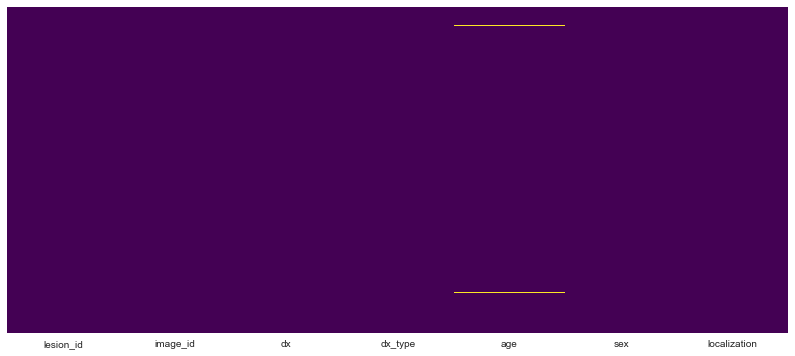

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')


After removing duplicates by lesion_id, the number of cancer decreases since lesion_id decreases 10015 to 7470.


In [9]:
data.sort_values("lesion_id", inplace = True) # Sorting the data with respect to column lesion_id using sort_values()
data.drop_duplicates(subset ="lesion_id",keep = ('first'), inplace = True) # droping the duplicates using drop_duplicates()
data.head() # data after droping duplicates has now matrix 7470x7

,lesion_id,image_id,dx,dx_type,age,sex,localization
9187,HAM_0000000,ISIC_0028498,nv,histo,60.0,male,back
726,HAM_0000001,ISIC_0027859,bkl,histo,70.0,female,face
1661,HAM_0000002,ISIC_0032622,mel,histo,65.0,female,lower extremity
3374,HAM_0000003,ISIC_0027886,nv,follow_up,55.0,male,trunk
4918,HAM_0000004,ISIC_0024645,nv,follow_up,40.0,female,back


<AxesSubplot:xlabel='dx', ylabel='count'>

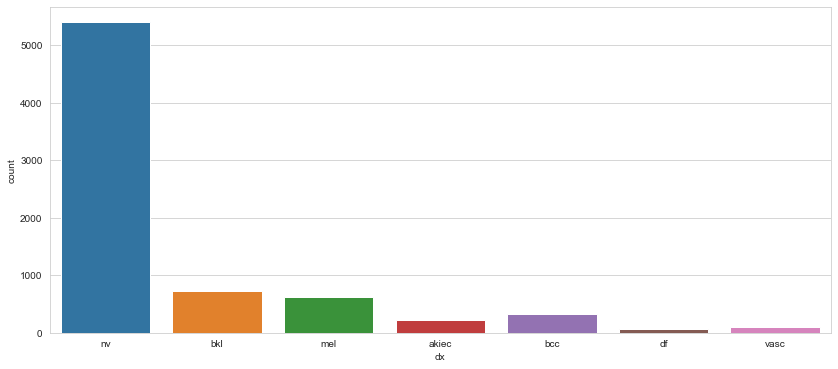

In [10]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='dx',data=data)

In [11]:
data.isnull().sum() # After droping duplicates now there are only 52 null values

lesion_id        0
image_id         0
dx               0
dx_type          0
age             52
sex              0
localization     0
dtype: int64

### groupby()

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. Pandas objects can be
split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [12]:
mean_value=data.groupby('dx')['age'].mean() # taking **mean** of cancer column **dx** by grouping with respect to **age**.
mean_value


dx
akiec    66.557018
bcc      66.896024
bkl      64.394150
df       52.739726
mel      61.296900
nv       47.257974
vasc     52.500000
Name: age, dtype: float64

In [13]:
median_value=data.groupby('dx')['age'].median()
median_value # taking **median** of cancer column **dx** by grouping with respect to **age**


dx
akiec    67.5
bcc      70.0
bkl      65.0
df       55.0
mel      65.0
nv       45.0
vasc     55.0
Name: age, dtype: float64

## Filling Null Values

Here it should be notice that filling of null values is taking place in column age with respest to cancer type dx. Meaning, the
median of age of akiec group cancer patient will only fill null values of akiec age group and so other.

In [14]:
# filling the null values by using median_value
data["age"] = data.groupby("dx").transform(lambda x: x.fillna(x.median()))
data.head()

C:\Users\Adarsh Raghav\AppData\Local\Temp\ipykernel_7556\1260157281.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data["age"] = data.groupby("dx").transform(lambda x: x.fillna(x.median()))
C:\Users\Adarsh Raghav\AppData\Local\Temp\ipykernel_7556\1260157281.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data["age"] = data.groupby("dx").transform(lambda x: x.fillna(x.median()))


,lesion_id,image_id,dx,dx_type,age,sex,localization
9187,HAM_0000000,ISIC_0028498,nv,histo,60.0,male,back
726,HAM_0000001,ISIC_0027859,bkl,histo,70.0,female,face
1661,HAM_0000002,ISIC_0032622,mel,histo,65.0,female,lower extremity
3374,HAM_0000003,ISIC_0027886,nv,follow_up,55.0,male,trunk
4918,HAM_0000004,ISIC_0024645,nv,follow_up,40.0,female,back


In [15]:
data.isnull().sum() # now we can clearly see that there is no null values remaining.

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Here,by visualizing ditribution plot of age, We can clearly see that the highest number of cancer patient are from the age group
(40,60) and highest number of cancer patient are of age 45.


C:\Users\Adarsh Raghav\Downloads\Ashish Raghav\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

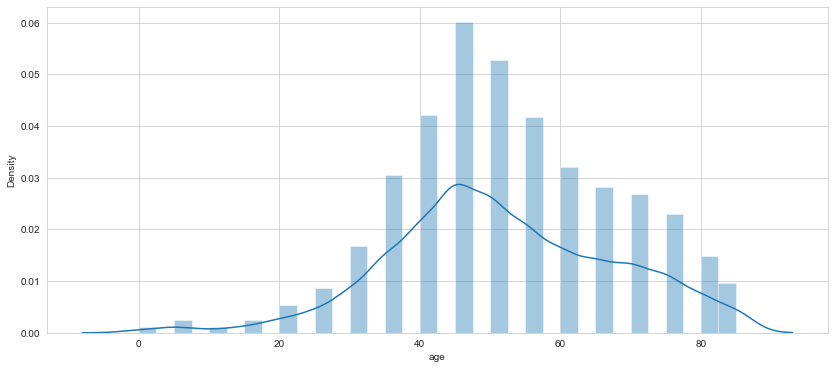

In [16]:
plt.figure(figsize=(14,6))
sns.distplot(data['age'].dropna(),kde=True)


To see which body part is affected most by these cancers, We can easily see by visualizing the data with respect to
**x='localization'**, **lower extremity** is affected most followed by **back* & than **trunk** and the least affected part is **ear** and there
is almost no cancer at **acral.**.


<AxesSubplot:xlabel='localization', ylabel='count'>

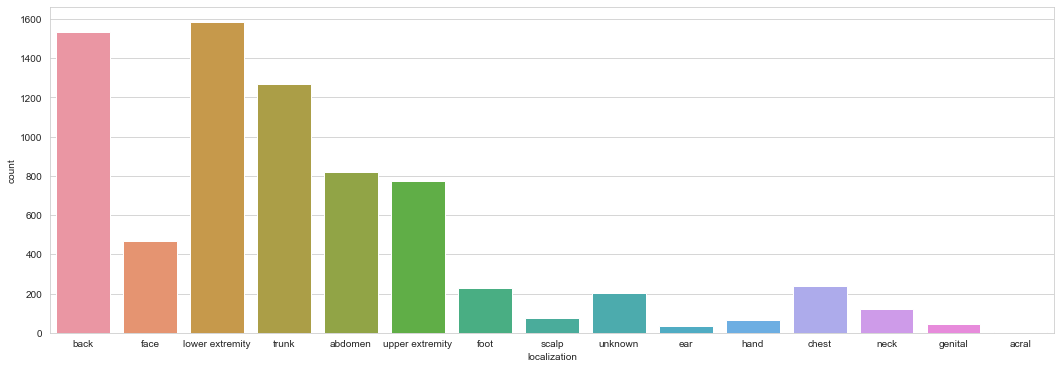

In [17]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.countplot(x='localization',data=data)

Now, Visualizing the data with respect to **x='localization'** and cancers type **dx**. We can clearly see at **lower extremity nv**
cancer has affected most follwed by **bkl & mel**. Similarly at **back** side **nv** has affected most followed by **mel &bkl**. But when
we look at **ear** , there we can see this is least affected part of our body and mainly affected by **nv & mel** and there is almost no
cancer at **acral**.


<AxesSubplot:xlabel='localization', ylabel='count'>

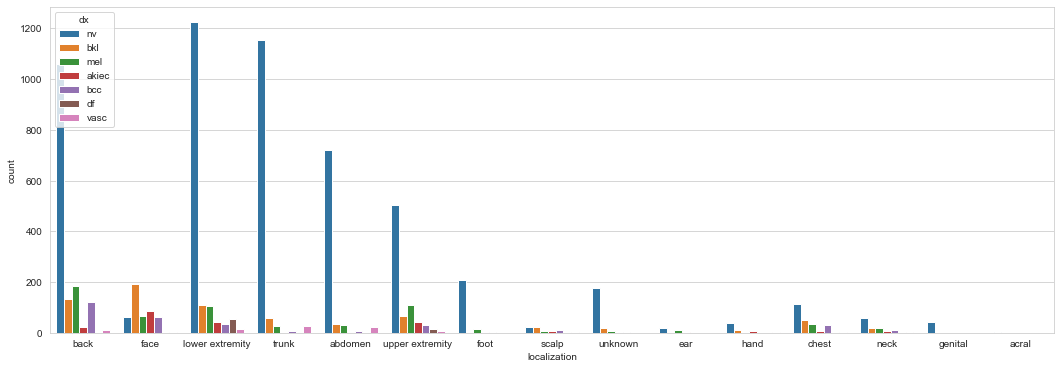

In [18]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.countplot(x='localization',hue='dx',data=data,palette=None)

Now by ploting boxplot with respect to cancers type **x='dx'** with **age**. we can see **nv** has affected people at early age around
(40,55), while **vasc** has large age interval of affecting people of age around (45,70) and **bcc** has affected mostly older age
people around (60, 77).


<AxesSubplot:xlabel='dx', ylabel='age'>

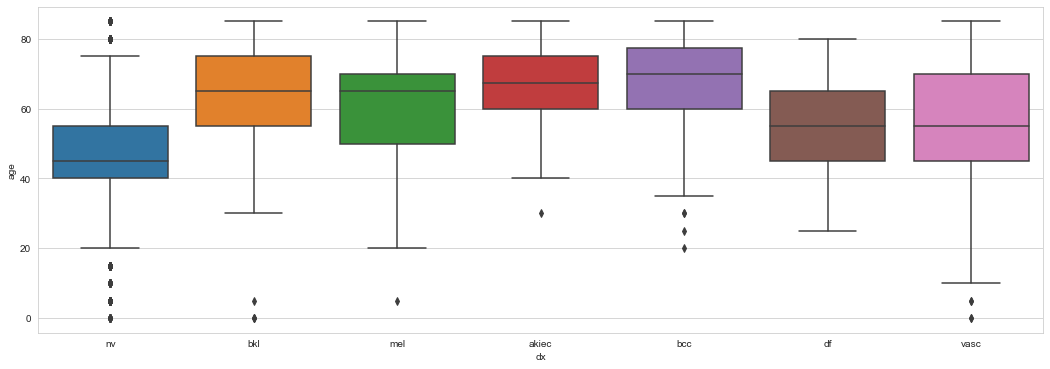

In [19]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.boxplot(x='dx',y='age',data=data,palette=None )

similarly, adding age into above boxplot we can see whether affected person is male or female and which cancer has affected
at early age or which has affected at older age.

<AxesSubplot:xlabel='dx', ylabel='age'>

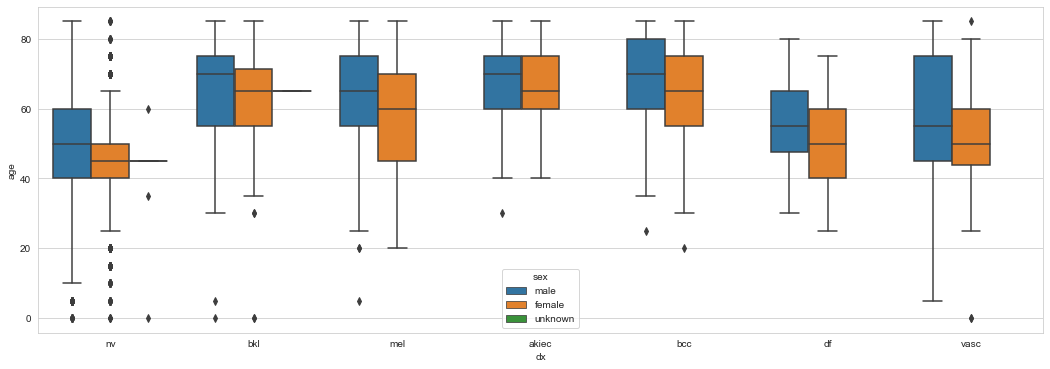

In [20]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.boxplot(x='dx',y='age',hue='sex',data=data,palette=None )

# Data Manipulation and Data Wrangling

Data Manipulation is the process of changing data to make it easier to read or more organized

Data Wrangling is process of transforming and mapping data from one raw data into another format with the intent of making
it more appropriate and valuable for a variety of downstream purposes such as analytics

In [23]:
!pip install opencv-python

In [24]:
#importing all the important libraies
import cv2
import numpy as np
import pandas as pd
import os
import glob

In [25]:
# importing metadata from the directory
df = pd.read_csv("HAM10000_metadata.csv")
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [26]:
# to show the categories of lesion
np.unique(df['dx'].tolist())

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='<U5')

In [27]:
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [30]:
img_dir = "C:\\Users\\Adarsh Raghav\\dataverse_files\\HAM10000_images_part_1"
# Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data=[]
F1=[]
for f1 in files:
    word_list= f1.split('\\')                      # spliting the path of each file with"\"
    F1.append(word_list[-1].split('.')[0])        # spliting the image Id (eg.ISIC_0034320.jpg) of each file with "."
    img = cv2.imread(f1)
    images=image_to_feature_vector(img, size=(32, 32)) # resizeing of an image
    images1=images.tolist()
    data.append(images1)

In [31]:
# number of images in the data
len(data)


10015

In [32]:
 # number of pixels in the data
len(data[0])

3072

In [33]:
a=['image_id']
str1='Pixel_'
for i in range(3072):
    a.append(str1 + str(i))

In [34]:
# Python3 program to Convert 1D 
# list to 2D list 
from itertools import islice
def convert(lst, var_lst):
    it = iter(lst)
    F2=[list(islice(it, i)) for i in var_lst]
    return F2
 
# Driver code 
var_lst = [1]*len(F1)
F2=convert(F1, var_lst)


In [35]:
def merge(lst1, lst2):
    return [a + b for (a, b) in zip(lst1, lst2)]
F3=merge(F2,data)

In [36]:
df1=pd.DataFrame(F3,columns=a)
df1.head(5)

,image_id,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,ISIC_0024306,135,132,231,125,123,233,134,131,236,...,221,136,151,224,130,147,217,132,141,214
1,ISIC_0024307,134,120,213,130,119,217,134,116,214,...,219,145,142,214,147,142,214,109,110,180
2,ISIC_0024308,178,172,247,185,176,248,186,176,248,...,215,148,136,209,158,149,218,151,143,214
3,ISIC_0024309,140,122,212,135,113,205,138,120,211,...,196,124,123,195,120,120,189,122,121,187
4,ISIC_0024310,37,31,68,35,31,74,134,124,188,...,201,144,126,203,79,88,146,43,33,73


In [37]:
# labeling the categories of lesion
def score_to_numeric(x):
    if x=='akiec':
        return 0
    if x=='bcc':
        return 1
    if x=='bkl':
        return 2
    if x=='df':
        return 3
    if x=="mel":
        return 4
    if x=='nv':
        return 5
    if x=='vasc':
        return 6

In [38]:
#df=df.drop('label',axis=1)
# merging the metadata with pixels of the images according to the image_ID
df3=pd.merge(df, df1, on='image_id', how='outer')
df3.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,Pixel_0,Pixel_1,Pixel_2,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,187,148,190,...,178,154,132,178,167,150,183,177,153,185
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,23,...,91,43,26,42,27,14,24,28,15,25
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,146,133,186,...,167,143,128,160,139,117,151,116,105,134
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,27,16,31,...,77,22,16,29,16,12,26,16,12,24
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,134,110,153,...,219,179,161,202,132,122,158,84,69,101


In [39]:
df3['label']=df['dx'].apply(score_to_numeric)
df3.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,Pixel_0,Pixel_1,Pixel_2,...,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,187,148,190,...,154,132,178,167,150,183,177,153,185,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,23,...,43,26,42,27,14,24,28,15,25,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,146,133,186,...,143,128,160,139,117,151,116,105,134,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,27,16,31,...,22,16,29,16,12,26,16,12,24,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,134,110,153,...,179,161,202,132,122,158,84,69,101,2


In [40]:
# saving the dataframe 
df3.to_csv('df3_final.csv', header=True, index=False)
